# Gaussian linear model extended

The model is now extended to two independent variables:

$$
y\sim N(\mu,\sigma^{2})
$$
$$
\mu=a+bx_{1}+cx_{2}
$$

Here, $x_1$ and $x_2$ are the independent variables and $y$ is the dependent variable. Given a data set of values for $x_1,x_2,y$ the task is to infer the values of $a,b,c$ and $\sigma$.

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -755.6: 100%|██████████| 200000/200000 [00:18<00:00, 11090.29it/s] 
Finished [100%]: Average ELBO = -755.61
100%|██████████| 1000/1000 [00:09<00:00, 109.17it/s]



a:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  2.065            0.087            0.004            [1.910, 2.244]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  1.893          2.008          2.060          2.120          2.241


b:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  3.454            0.681            0.048            [2.300, 4.735]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  2.349          2.870          3.402          3.962          4.795


c:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------

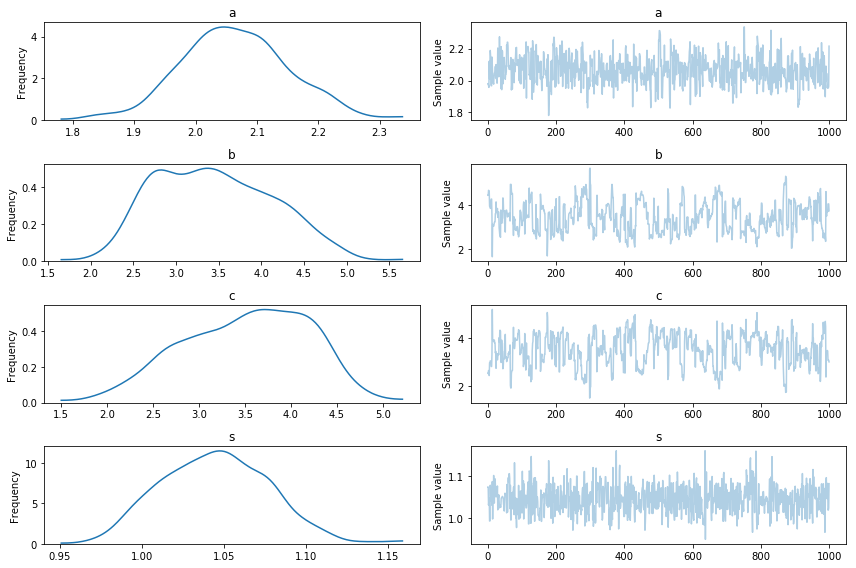

In [1]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt

# True values for a,b,c,sigma
ts=1
ta=2
tb=3
tc=4

# Generate some data for y,x1,x2 and given a,b,c,sigma
n=500 # number of data points
x1=np.linspace(0,1,n)
x2=np.linspace(0,1,n)
y=ta + tb*x1 + tc*x2
y=y + np.random.normal(0, ts, n)

# Create pyMC3 model object
linear_model = pm.Model()

with linear_model:
    # Priors
    a=pm.Normal('a', mu=0, sd=1)
    b=pm.Normal('b', mu=0, sd=1)
    c=pm.Normal('c', mu=0, sd=1)
    s=pm.HalfNormal('s', sd=1)
    
    # m is a "deterministic variable"
    m=a + b*x1 + c*x2
    
    # Likelihood
    y_obs=pm.Normal("y_obs", mu=m, sd=s, observed=y)

    trace = pm.sample(1000)
    
    pm.summary(trace)
    pm.traceplot(trace)
    plt.show()
